In [1]:
!nvidia-smi

Mon Jul 10 04:09:48 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Change directory to your project folder
%cd /content/drive/MyDrive/YOLO V8/Revent2.ai.v1i.yolov8

/content/drive/MyDrive/YOLO V8/Revent2.ai.v1i.yolov8


In [ ]:
!pip install ultralytics==8.0.28

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/78.2 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

In [ ]:
%cd /content/drive/MyDrive/YOLO V8/Revent2.ai.v1i.yolov8

!yolo task=segment mode=train model=yolov8s-seg.pt data=data.yaml epochs=25 imgsz=640

/content/drive/MyDrive/YOLO V8/Revent2.ai.v1i.yolov8
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=segment, mode=train, model=yolov8s-seg.pt, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=

In [ ]:
!ls runs/segment/train2


args.yaml					    train_batch0.jpg
BoxF1_curve.png					    train_batch1.jpg
BoxP_curve.png					    train_batch2.jpg
BoxPR_curve.png					    train_batch540.jpg
BoxR_curve.png					    train_batch541.jpg
confusion_matrix.png				    train_batch542.jpg
events.out.tfevents.1688026803.690880b362e9.1625.0  val_batch0_labels.jpg
MaskF1_curve.png				    val_batch0_pred.jpg
MaskP_curve.png					    val_batch1_labels.jpg
MaskPR_curve.png				    val_batch1_pred.jpg
MaskR_curve.png					    val_batch2_labels.jpg
results.csv					    val_batch2_pred.jpg
results.png					    weights


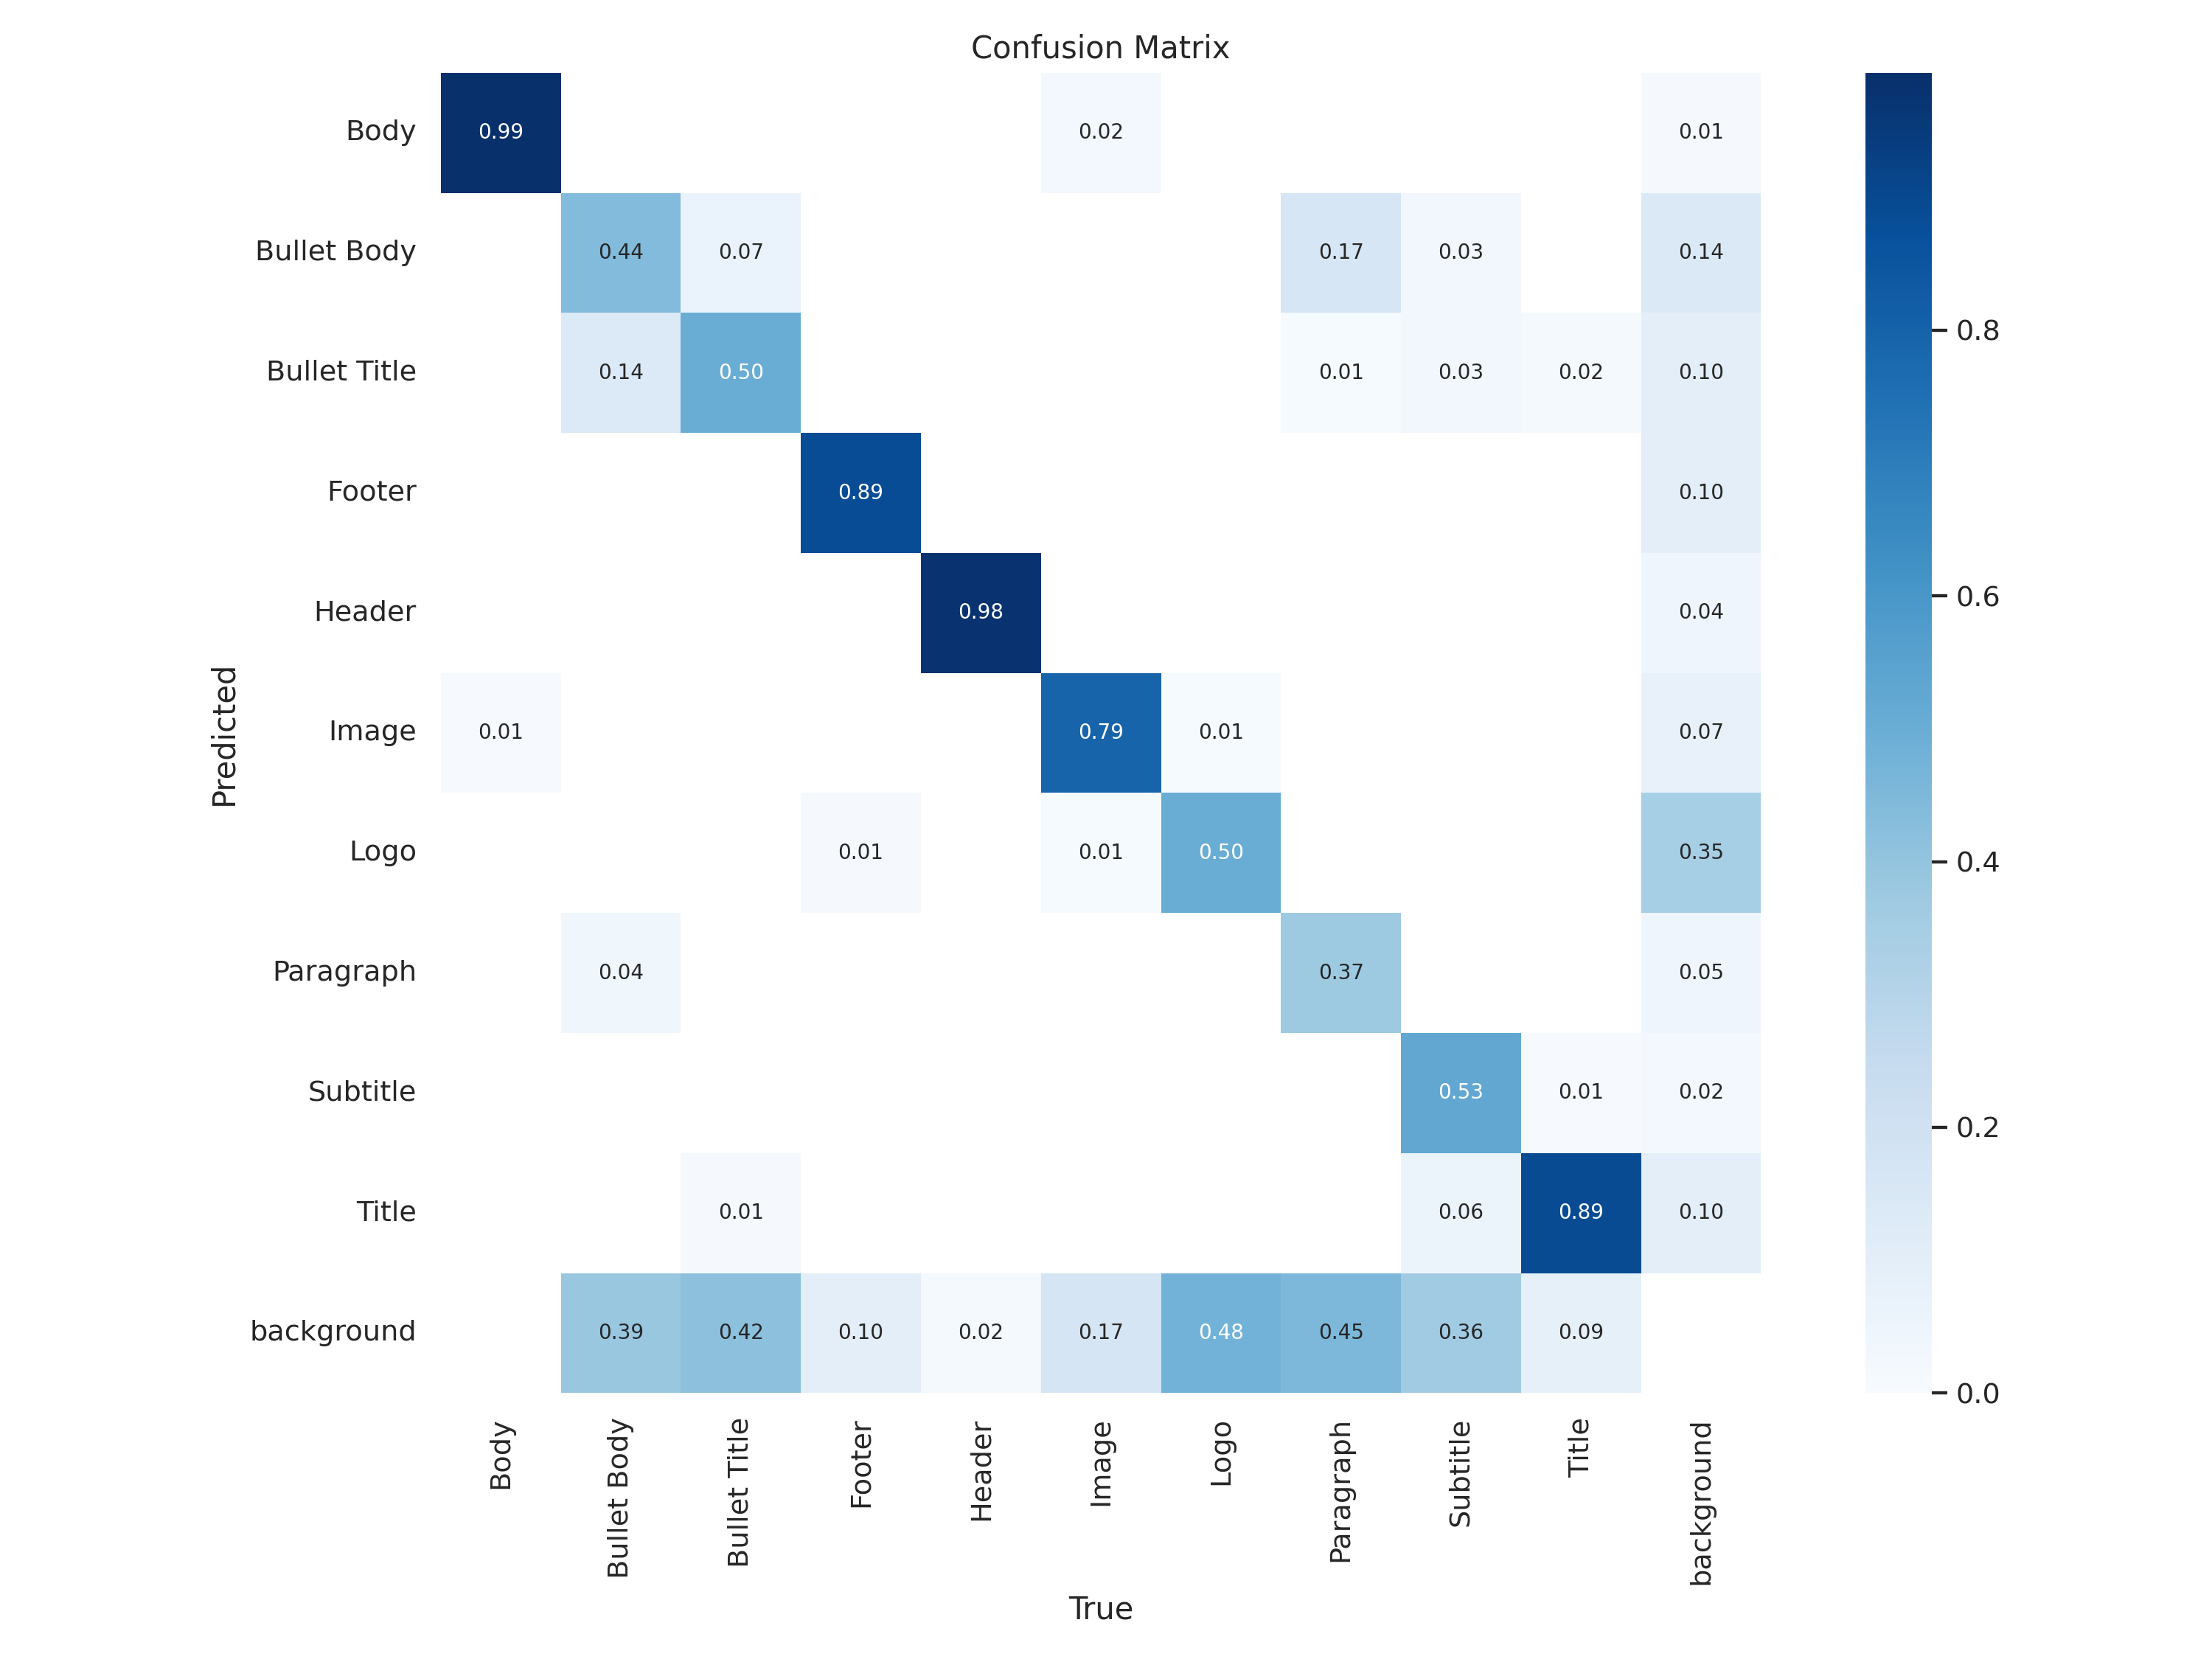

In [ ]:
Image(filename='runs/segment/train2/confusion_matrix.png', width=600)

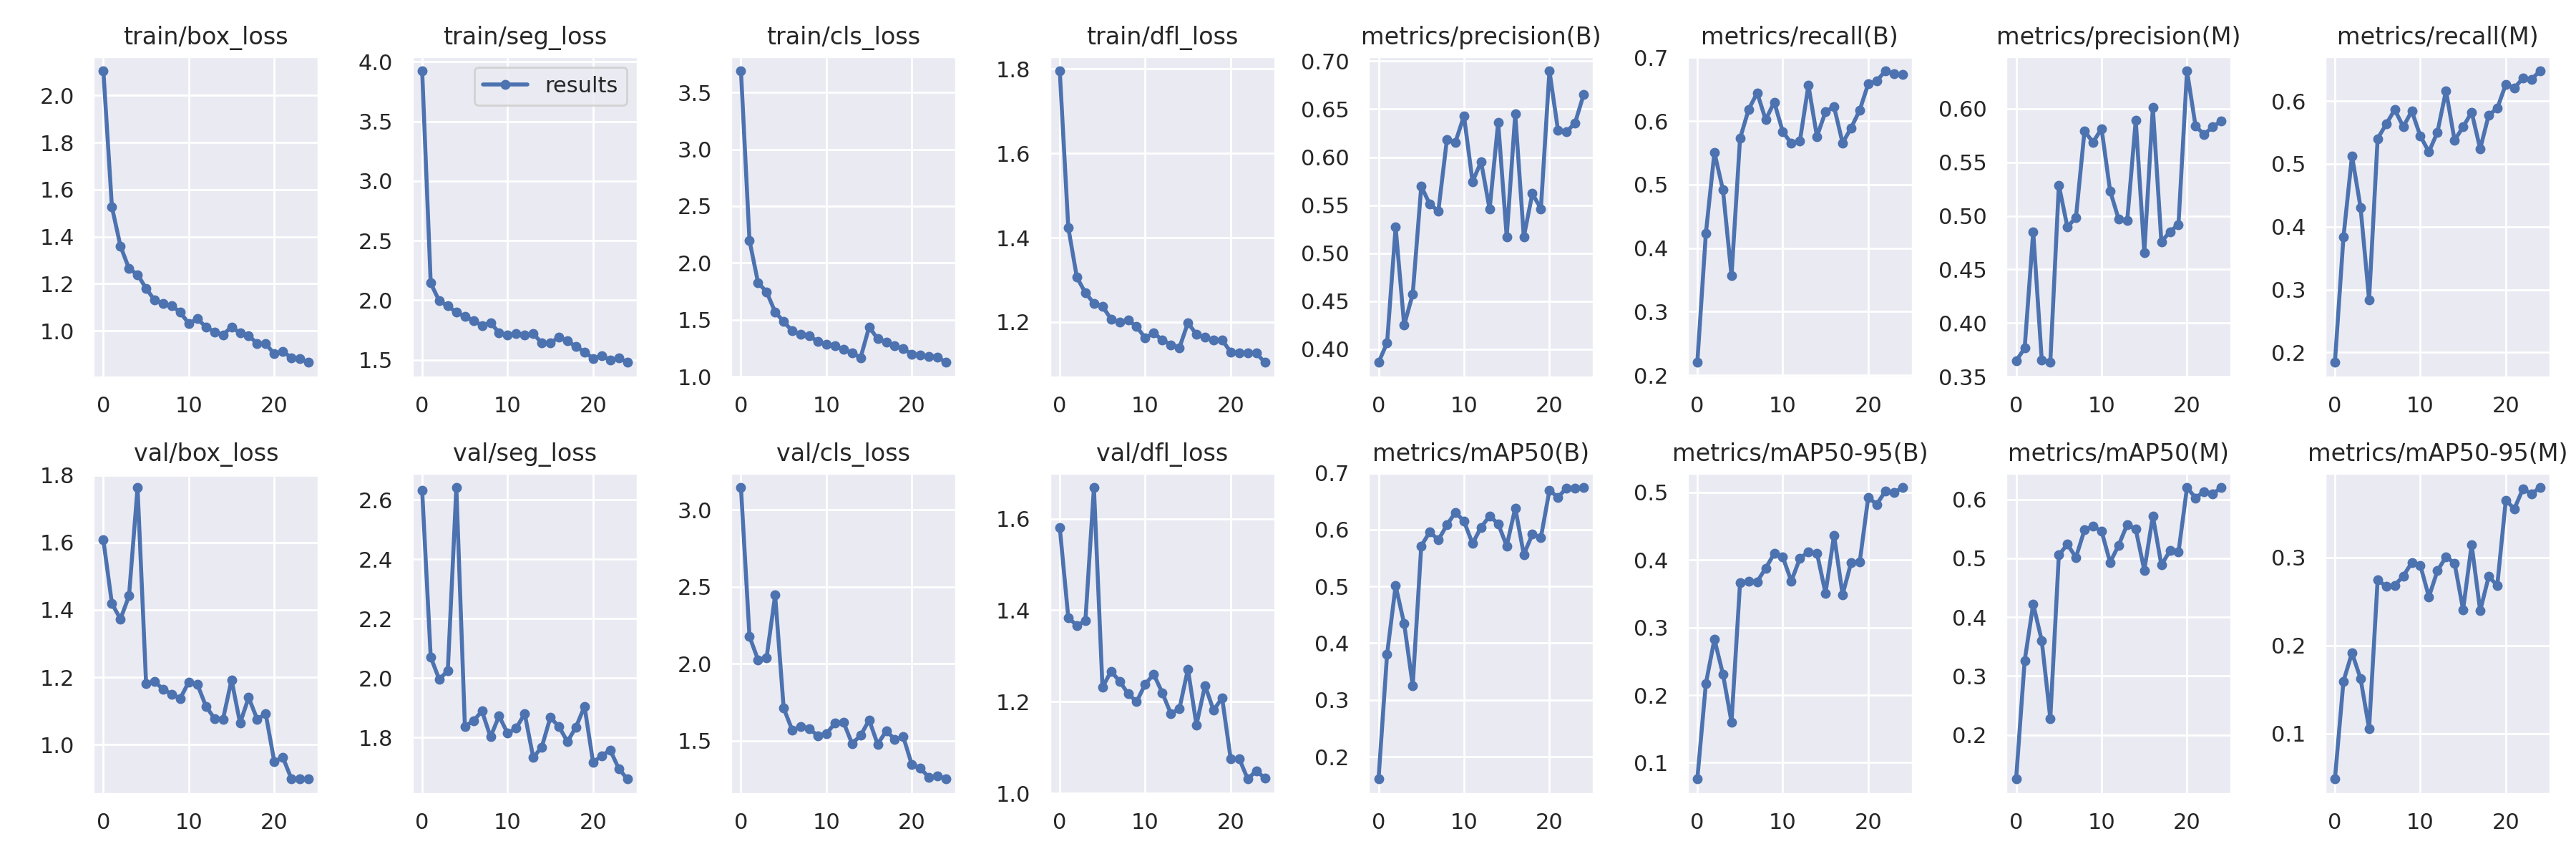

In [ ]:
Image(filename='runs/segment/train2/results.png', width=600)

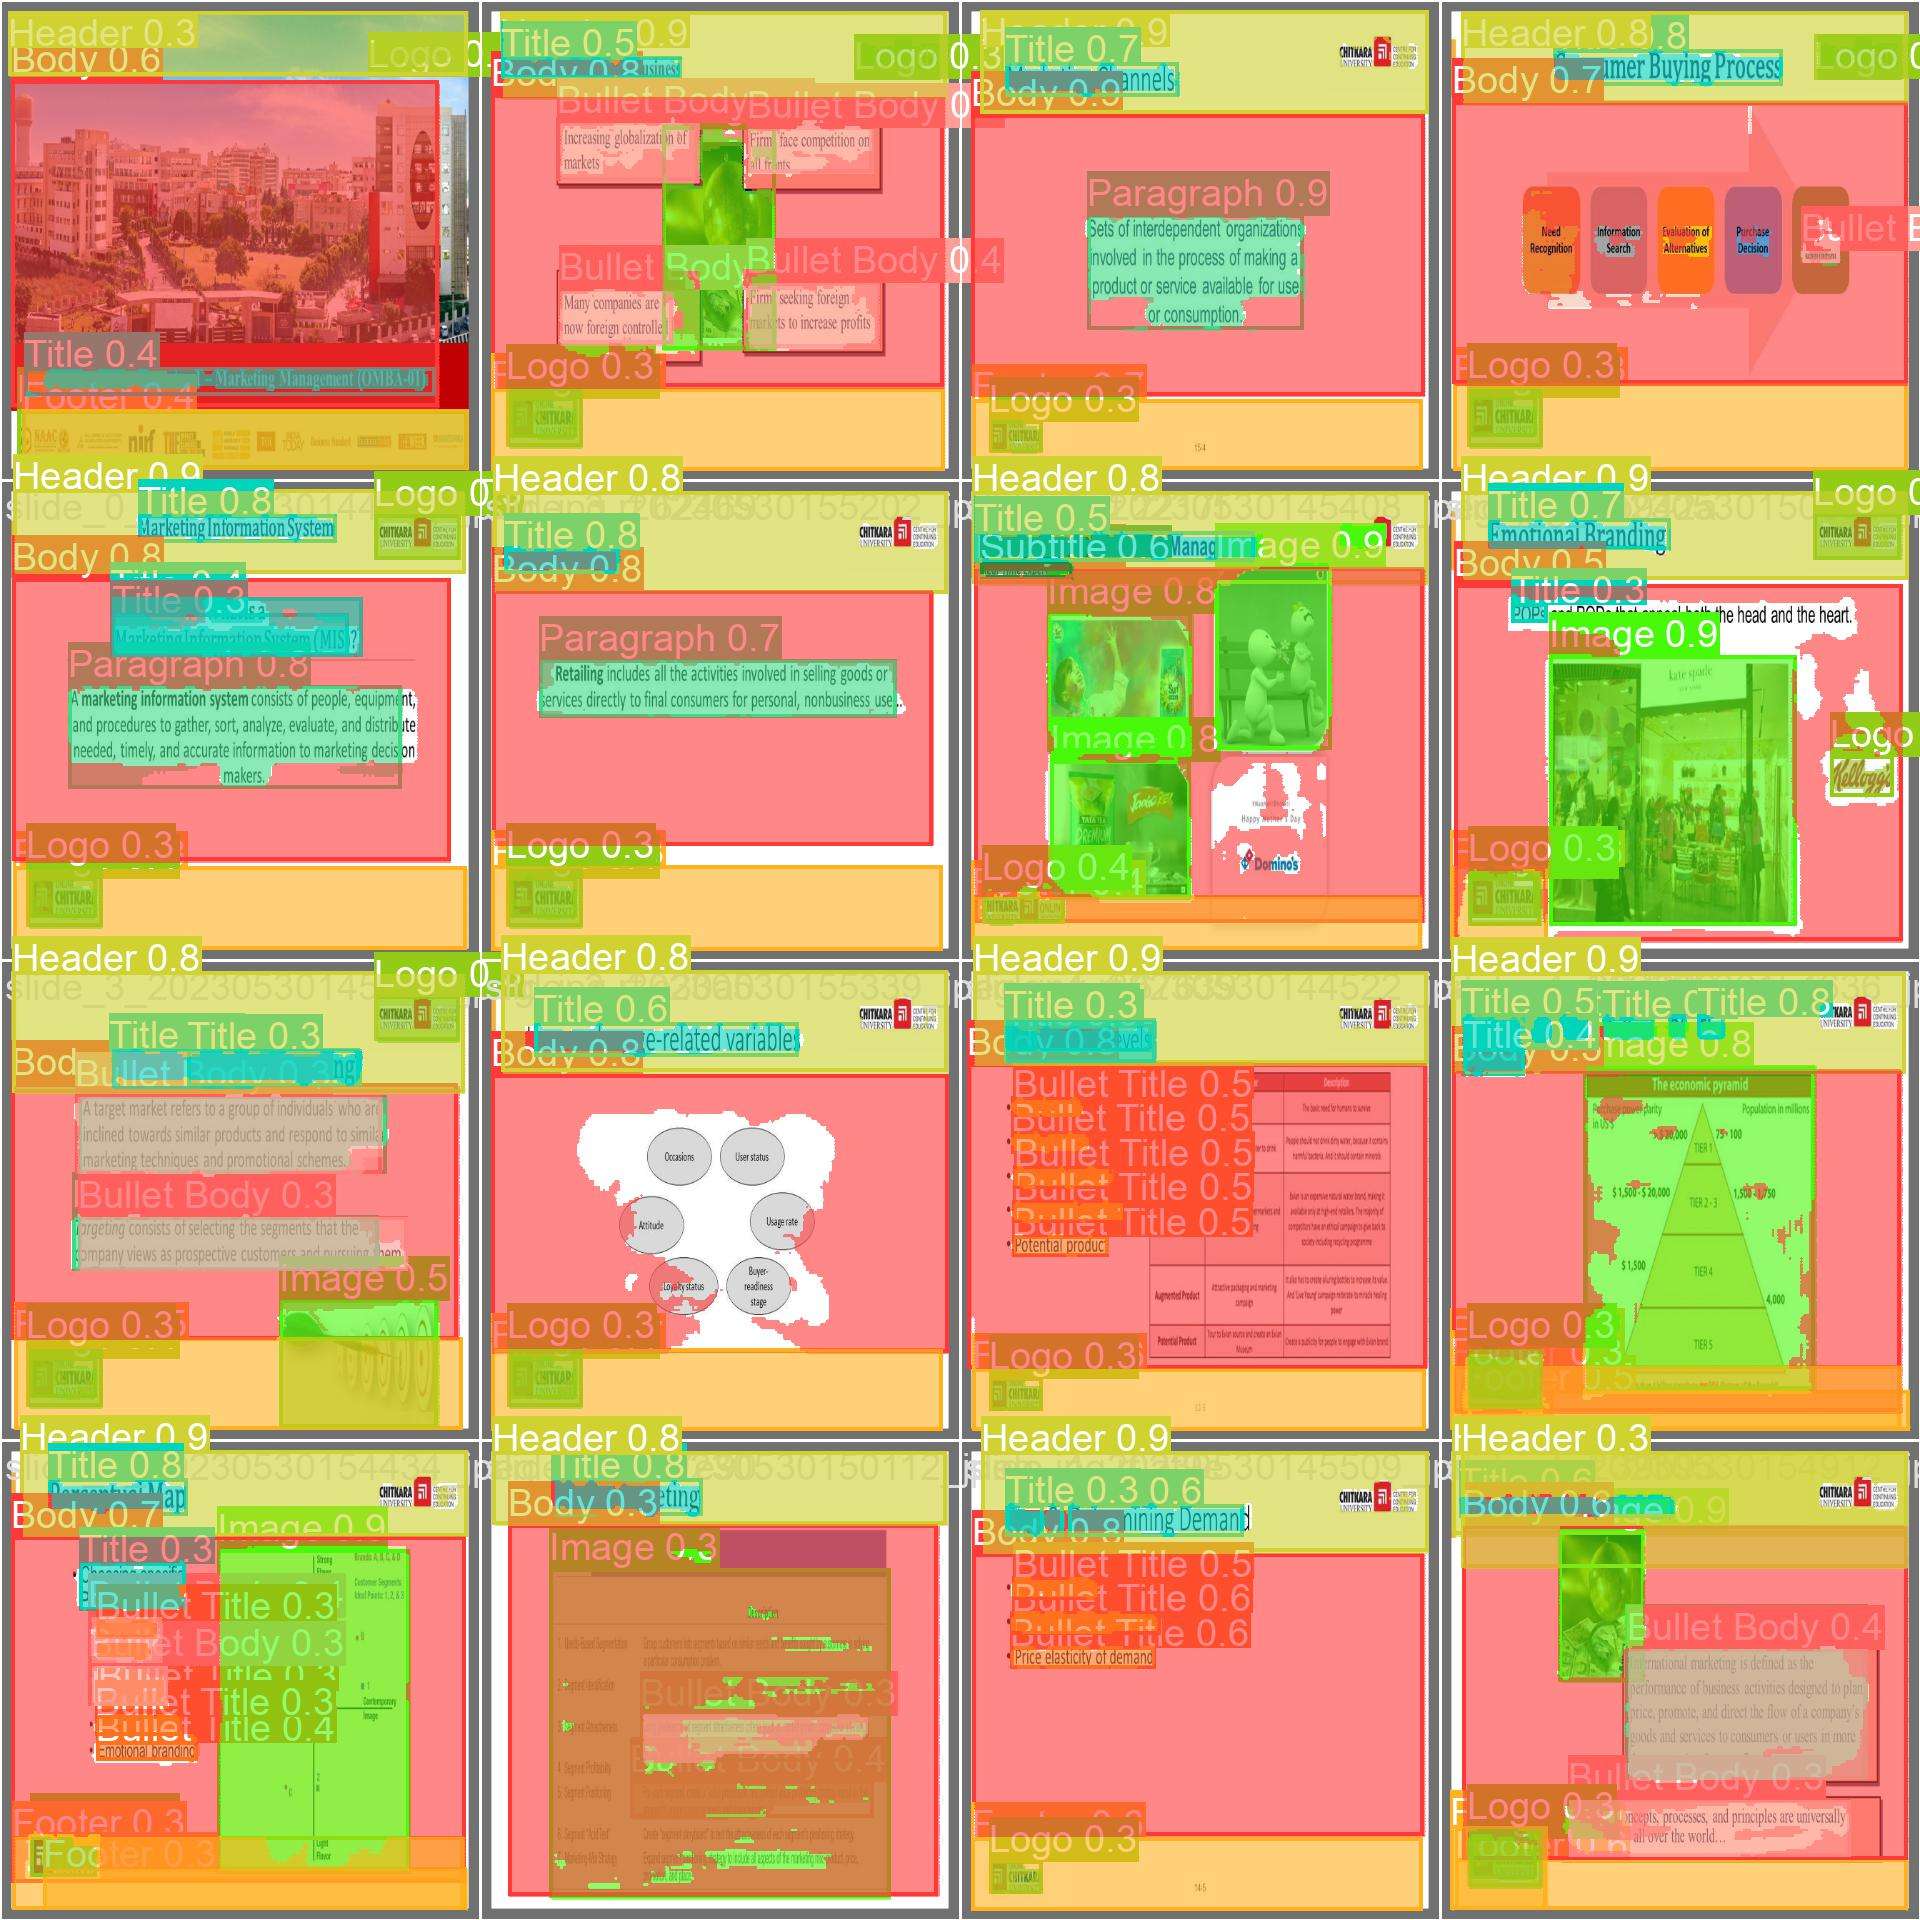

In [ ]:
Image(filename='runs/segment/train2/val_batch0_pred.jpg', width=600)

In [ ]:
!yolo task=detect mode=val model=runs/segment/train2/weights/best.pt data=data.yaml

WARNING ⚠️ 'task=detect' conflicts with segment model runs/segment/train2/weights/best.pt. Inheriting 'task=segment' from runs/segment/train2/weights/best.pt and ignoring 'task=detect'.
2023-06-29 08:56:56.095091: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-29 08:56:56.918386: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11783470 parameters, 0 gradients, 42.5 GFLOPs
val: Scanning /content/drive/MyDrive/YOLO V8/Revent2.ai.v1i.yolov8/valid/labels.cache... 164 images, 0 backgrounds, 0 corrupt: 100% 164/164 [00:00<?, ?it/s]
                 Class     Images  Instances   

In [ ]:
!yolo task=detect mode=predict model=runs/segment/train2/weights/best.pt conf=0.25 source=test/images

WARNING ⚠️ 'task=detect' conflicts with segment model runs/segment/train2/weights/best.pt. Inheriting 'task=segment' from runs/segment/train2/weights/best.pt and ignoring 'task=detect'.
2023-06-29 09:02:58.056180: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-29 09:02:59.372913: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11783470 parameters, 0 gradients, 42.5 GFLOPs

image 1/82 /content/drive/MyDrive/YOLO V8/Revent2.ai.v1i.yolov8/test/images/slide_0_20230530144722_jpeg_jpg.rf.5193648b55a3c9170cc3dbf6cca32707.jpg: 640x640 1 Body, 3 Logos, 21.0ms
image 2/82 /content/dr

In [ ]:
!yolo task=detect mode=predict model=runs/segment/train2/weights/best.pt conf=0.25 source=pred2

WARNING ⚠️ 'task=detect' conflicts with segment model runs/segment/train2/weights/best.pt. Inheriting 'task=segment' from runs/segment/train2/weights/best.pt and ignoring 'task=detect'.
2023-07-01 07:47:52.345860: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-01 07:47:53.207996: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.28 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8s-seg summary (fused): 195 layers, 11783470 parameters, 0 gradients, 42.5 GFLOPs

image 1/93 /content/drive/MyDrive/YOLO V8/Revent2.ai.v1i.yolov8/pred2/slide_0_20230524145649.png: 384x640 1 Body, 1 Header, 1 Image, 1 Title, 129.8ms
image 2/93 /content/drive/MyDrive/YOLO V8/Revent2.ai.

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob('runs/detect/pred2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")